# Dataset

In [1]:
import pandas as pd

dataset_df = pd.read_csv('data/csv/All.csv', encoding='utf-8', dtype=str, low_memory=False)

In [2]:
dataset_df

,PTTp,PTTf,PTTd,HeartRate,SBP,DBP,AI,LASI,S1,S2,S3,S4
0,0.0883809523809524,0.44000000000000006,2.6733333333333333,125.12695097297141,130.43329604900043,64.68913169835835,0.9922470519252067,2.392,11.784402737047898,4.340562267839687,2.131208602150538,18.303930400782015
1,0.07000000000000002,0.41515789473684217,1.672,123.96177910670554,157.72738151641408,64.38629825186952,0.9177047289504034,3.84,6.033327859237537,7.44174467253177,5.302010557184752,18.826870772238514
2,0.07847619047619048,0.44320000000000004,0.504,121.96242854624663,140.10442869493437,50.98347603952466,0.989021633839199,1.48,3.8016195503421315,2.742877028347996,11.476136070381234,18.06877732160313
3,0.05676190476190477,0.3928000000000001,3.544,129.59047971954195,138.06274513634833,55.58459066198415,0.9848300582474556,0.48,13.149560899315741,0.9034979472140763,4.079298533724341,18.179439296187688
4,0.0712,0.4374736842105264,3.2440000000000007,121.84646571478936,132.6019742786947,55.93626821274539,0.9975117862755369,1.488,6.727907722385142,2.710827761485826,8.864481720430108,18.350898142717497
...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.5011428571428571,0.3822857142857144,2.518857142857143,90.13468008419939,168.8285046099021,97.14496720610043,0.9449321628092577,4.008,8.27980136852395,7.3020715542522,2.2052527859237534,17.840430889540567
4941,0.3381333333333334,0.2661333333333333,4.872571428571429,90.51399808433051,138.18569728798263,78.64674610664025,0.894874694922317,0.504,16.8972715542522,1.0228183773216033,0.8687593352883677,18.837203519061585
4942,0.5068571428571428,0.41599999999999987,1.0426666666666666,90.51821592016374,178.1948408953702,78.07234000152394,0.9983107051241943,2.824,6.2422357771260994,4.815519843597263,7.001963636363637,18.109645356793745
4943,0.29947826086956525,0.20973913043478265,3.3327999999999998,155.74575797668763,113.00553565632205,56.17062845987654,0.997623177233892,7.712,3.030912218963832,15.89653567937439,1.3085294232649072,20.284596676441836


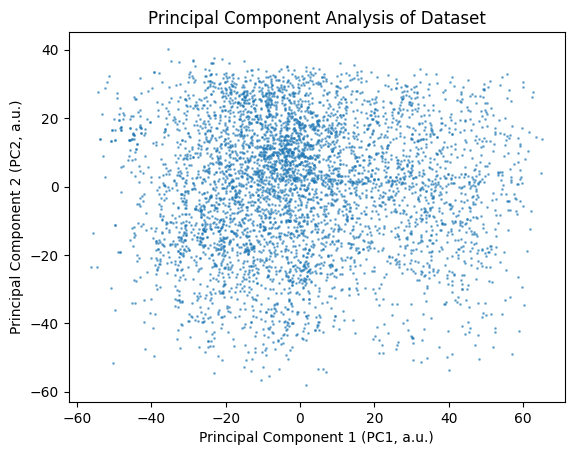

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA_sklearn

dataset_initial_PCA = PCA_sklearn(n_components=2)
PC1, PC2 = dataset_initial_PCA.fit_transform(dataset_df).T

plt.scatter(PC1, PC2, s=1, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1, a.u.)')
plt.ylabel('Principal Component 2 (PC2, a.u.)')
plt.title('Principal Component Analysis of Dataset')
plt.show()
plt.savefig('figures/PCA_initial.png', dpi=300, bbox_inches='tight')
plt.close()

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dbp = dataset_df[['DBP']].astype(np.float32)
sbp = dataset_df[['SBP']].astype(np.float32)
X = dataset_df.drop(columns=['DBP', 'SBP']).astype(np.float32)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

sbp_scaler = StandardScaler()
sbp_scaled = pd.DataFrame(sbp_scaler.fit_transform(sbp))

dbp_scaler = StandardScaler()
dbp_scaled = pd.DataFrame(dbp_scaler.fit_transform(dbp))

dbp = dbp['DBP']
sbp = sbp['SBP']

X_train, X_test, X_scaled_train, X_test_scaled, dbp_train, dbp_test, dbp_train_scaled, dbp_test_scaled, sbp_train, sbp_test, sbp_train_scaled, sbp_test_scaled = train_test_split(
    X, X_scaled, dbp, dbp_scaled, sbp, sbp_scaled, test_size=0.2, random_state=42
)

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, label="Model"):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    results_df = pd.DataFrame({
        'Model': [label],
        'R^2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })
    print(results_df)

    plt.figure(figsize=(5, 5))
    plt.scatter(y_true, y_pred, alpha=0.5, label=label)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{label} for Calibration Curve")
    plt.legend()
    plt.show()

    errors = y_true - y_pred
    plt.figure(figsize=(6, 5))
    plt.hist(errors, bins=min(round(max(errors) - min(errors)), 40), edgecolor='black', alpha=0.7)
    plt.xlabel("Error (True - Predicted)")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution for {label}")
    plt.show()

# Linear Regression

                   Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP  0.004339  51.435329  7.171843  5.612247


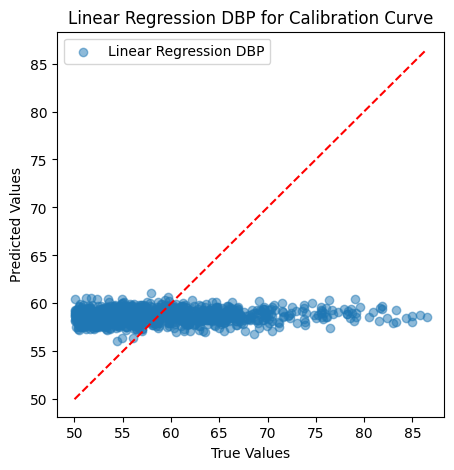

151     -4.884289
807     -2.174213
621     -4.143749
3976    -3.345703
3996     0.514404
          ...    
4856     1.894886
1052    -2.186787
4926     3.831875
4058    -3.677010
152     10.816814
Name: DBP, Length: 989, dtype: float32


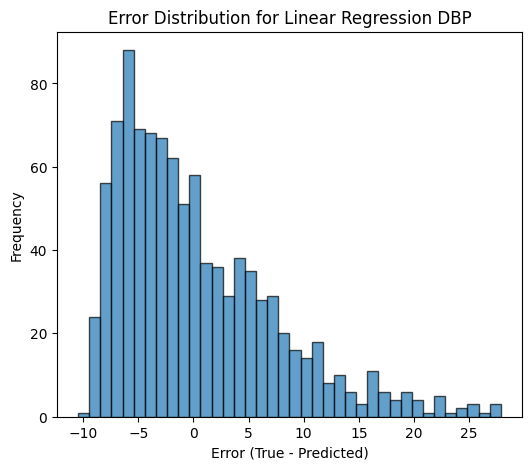

In [10]:
from sklearn.linear_model import LinearRegression

# Linear Regression for DBP
lr_dbp = LinearRegression()
lr_dbp.fit(X_train, dbp_train)
dbp_pred_lr = lr_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_lr, label="Linear Regression DBP")

                   Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP  0.011551  358.867371  18.943794  15.621503


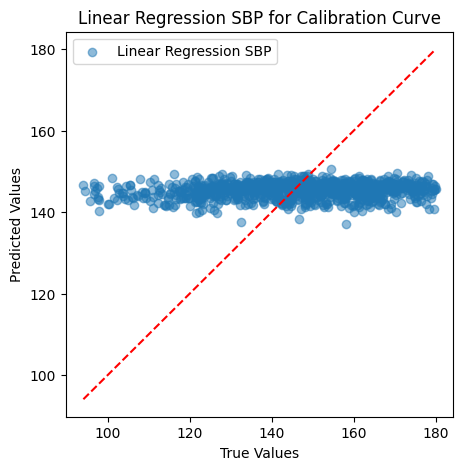

151     24.812469
807      3.992050
621     14.572388
3976   -16.186974
3996   -33.223175
          ...    
4856     2.171036
1052     5.735413
4926   -26.754913
4058    26.992096
152     24.684891
Name: SBP, Length: 989, dtype: float32


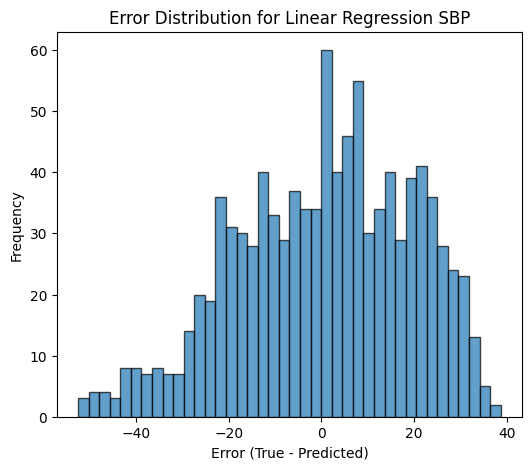

In [11]:
# Linear Regression for SBP
lr_sbp = LinearRegression()
lr_sbp.fit(X_train, sbp_train)
sbp_pred_lr = lr_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_lr, label="Linear Regression SBP")

# Random Forest Regressor

               Model       R^2       MSE      RMSE       MAE
0  Random Forest DBP  0.006625  51.31728  7.163608  5.619486


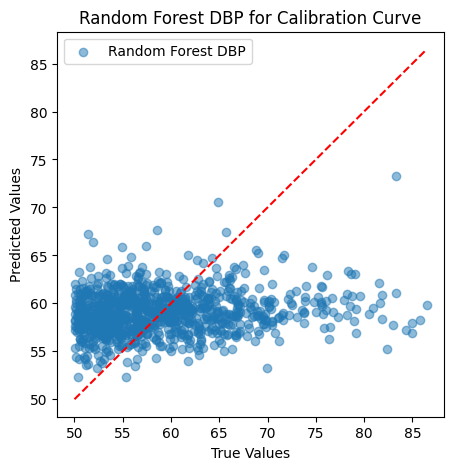

151     -7.023329
807      3.088661
621     -5.155025
3976    -5.371800
3996     0.432144
          ...    
4856    -0.789822
1052    -1.263109
4926     7.259336
4058    -4.515050
152     11.966471
Name: DBP, Length: 989, dtype: float64


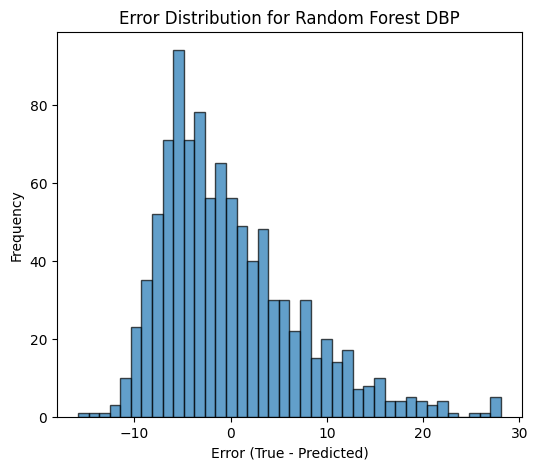

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest for DBP
rf_dbp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_dbp.fit(X_train, dbp_train)
dbp_pred_rf = rf_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_rf, label="Random Forest DBP")

               Model      R^2         MSE       RMSE        MAE
0  Random Forest SBP  0.14013  312.185369  17.668768  14.003902


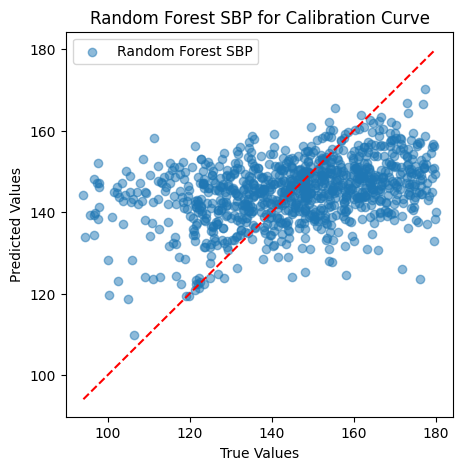

151     33.109892
807      7.461291
621     13.810507
3976   -17.965618
3996   -34.883506
          ...    
4856     0.848884
1052     3.238020
4926   -16.598868
4058    25.165041
152     29.862791
Name: SBP, Length: 989, dtype: float64


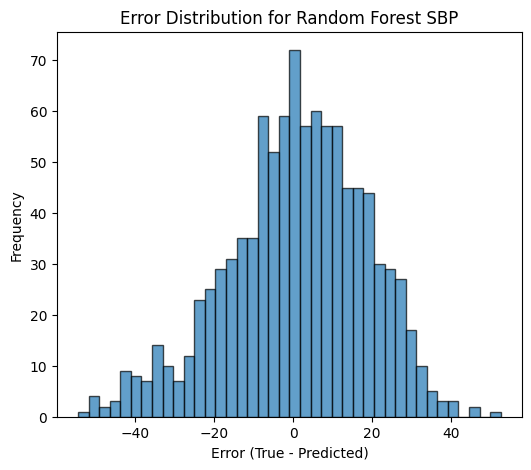

In [13]:
# Random Forest for SBP
rf_sbp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sbp.fit(X_train, sbp_train)
sbp_pred_rf = rf_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_rf, label="Random Forest SBP")

# XGBoost Regressor

         Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP -0.151842  59.503567  7.713855  5.872109


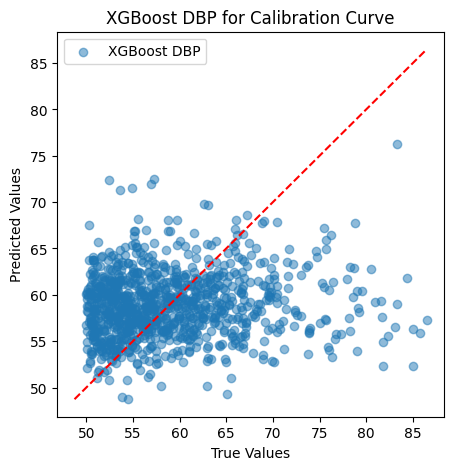

151     -8.624233
807      1.221004
621     -3.283546
3976    -9.698223
3996    -2.040890
          ...    
4856    -1.504948
1052    -0.574764
4926     1.888435
4058    -1.620819
152     13.989605
Name: DBP, Length: 989, dtype: float32


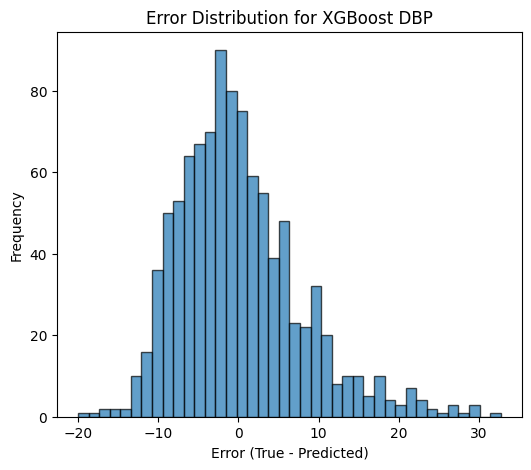

In [14]:
from xgboost import XGBRegressor

# XGBoost for DBP
xgb_dbp = XGBRegressor(random_state=42)
xgb_dbp.fit(X_train, dbp_train)
dbp_pred_xgb = xgb_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_xgb, label="XGBoost DBP")

         Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP  0.021112  355.395874  18.851946  14.797199


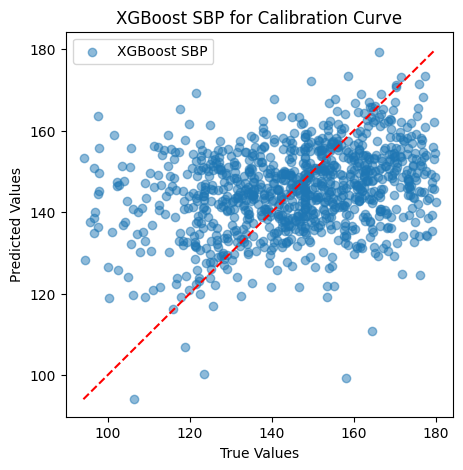

151     27.603012
807      3.544495
621      5.262253
3976   -25.198097
3996   -36.950638
          ...    
4856    11.107071
1052    -1.986160
4926   -15.147858
4058    24.186127
152     37.976883
Name: SBP, Length: 989, dtype: float32


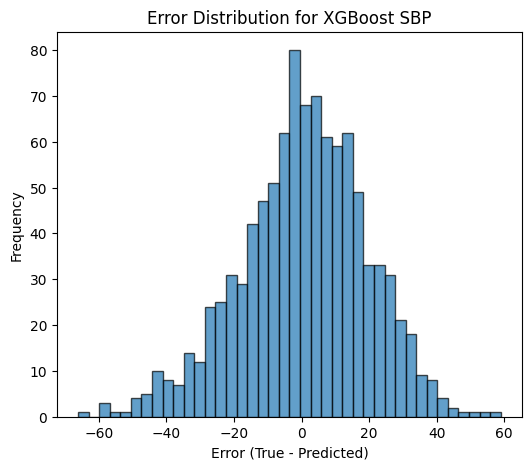

In [15]:

# XGBoost for SBP
xgb_sbp = XGBRegressor(random_state=42)
xgb_sbp.fit(X_train, sbp_train)
sbp_pred_xgb = xgb_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_xgb, label="XGBoost SBP")

# Support Vector Machine

     Model      R^2        MSE      RMSE       MAE
0  SVM DBP -0.07563  55.566496  7.454294  5.474444


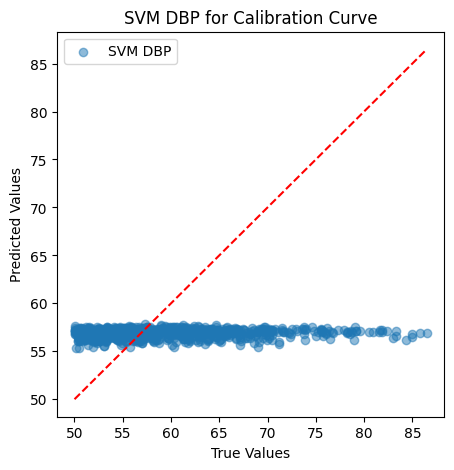

151     -3.971532
807     -0.737160
621     -2.192899
3976    -1.745895
3996     2.334172
          ...    
4856     3.375471
1052     1.333361
4926     6.048834
4058    -1.781055
152     12.623605
Name: DBP, Length: 989, dtype: float64


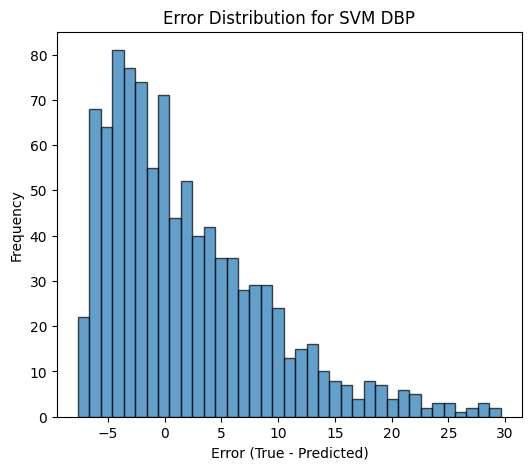

In [16]:
from sklearn.svm import SVR

# SVM for SBP
svm_dbp = SVR(kernel='rbf')
svm_dbp.fit(X_train, dbp_train)
dbp_pred_svm = svm_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_svm, label="SVM DBP")

     Model       R^2         MSE      RMSE        MAE
0  SVM SBP -0.006788  365.525451  19.11872  15.536955


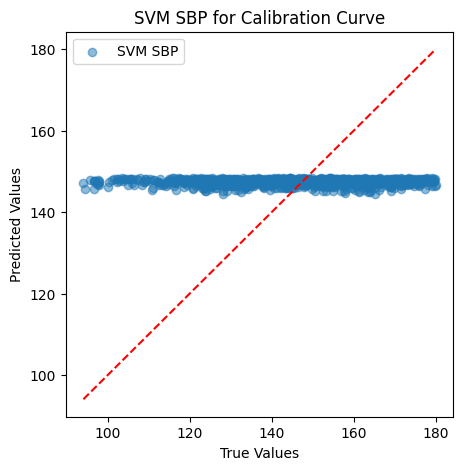

151     26.128121
807      4.034644
621     11.756992
3976   -20.436720
3996   -32.234103
          ...    
4856    -2.407189
1052     4.233066
4926   -31.868535
4058    26.043549
152     24.445263
Name: SBP, Length: 989, dtype: float64


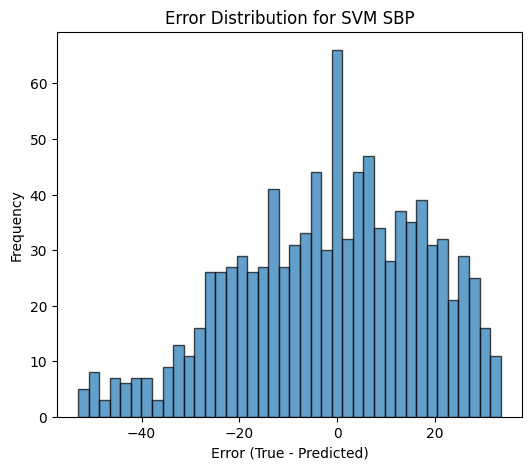

In [17]:
# SVM for SBP
svm_sbp = SVR(kernel='rbf')
svm_sbp.fit(X_train, sbp_train)
sbp_pred_svm = svm_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_svm, label="SVM SBP")

# Multilayer Perceptron Regressor

     Model       R^2        MSE      RMSE      MAE
0  MLP DBP -0.013859  52.375443  7.237088  5.73464


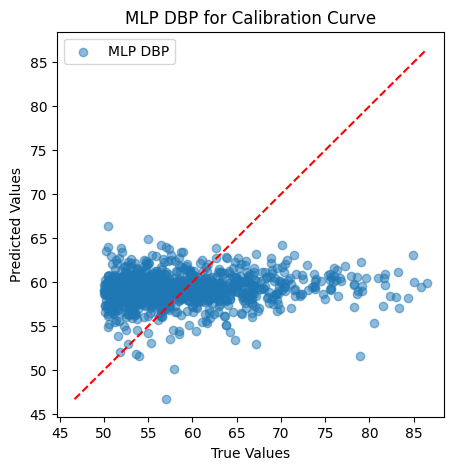

151     -3.464077
807     -2.124722
621     -4.918827
3976    -3.960716
3996    -1.428810
          ...    
4856     0.996159
1052     3.257816
4926    -1.208904
4058    -3.947308
152     11.010406
Name: DBP, Length: 989, dtype: float32


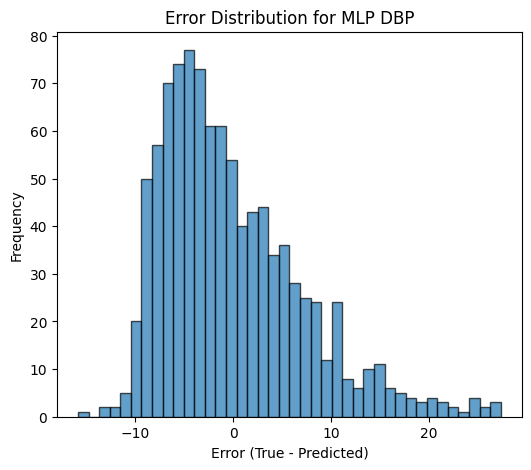

In [18]:
from sklearn.neural_network import MLPRegressor

# Train a basic multilayer perceptron for DBP
mlp_dbp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
mlp_dbp.fit(X_train, dbp_train)

# Predict and visualize
dbp_pred_mlp = mlp_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_mlp, label="MLP DBP")

     Model      R^2         MSE       RMSE        MAE
0  MLP SBP -0.08952  395.562256  19.888746  16.091644


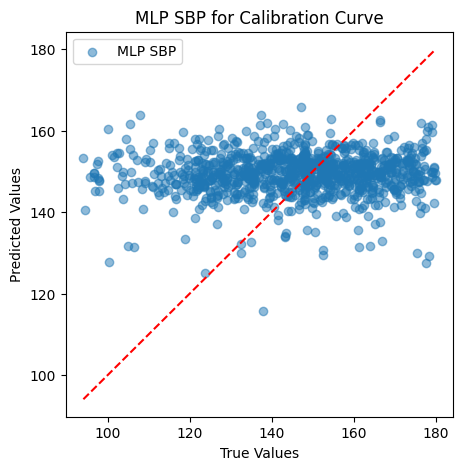

151     27.541611
807      4.315231
621      7.857224
3976   -22.231865
3996   -41.004593
          ...    
4856    -3.104279
1052     9.617447
4926   -42.013992
4058    22.047958
152     20.006393
Name: SBP, Length: 989, dtype: float32


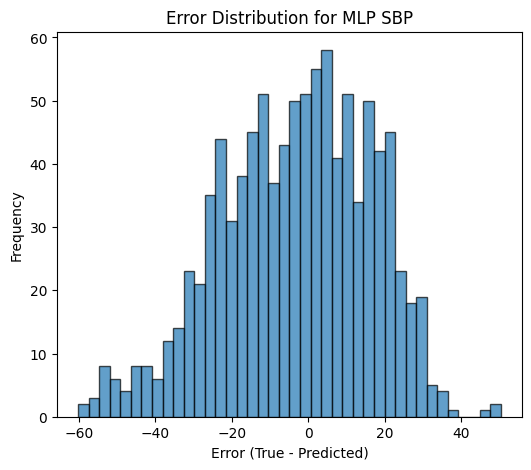

In [19]:
# Train a basic multilayer perceptron for SBP
mlp_sbp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
mlp_sbp.fit(X_train, sbp_train)

# Predict and visualize
sbp_pred_mlp = mlp_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_mlp, label="MLP SBP")

# Multilayer Perceptron w/ Scaled X

     Model       R^2        MSE      RMSE       MAE
0  MLP DBP -0.008106  52.078274  7.216528  5.572972


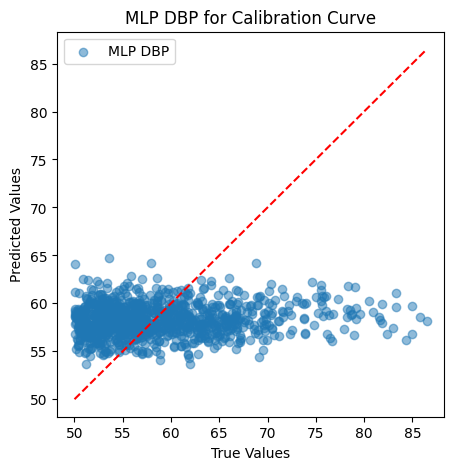

151     -3.691399
807     -0.329502
621     -5.817856
3976    -5.310921
3996     1.266476
          ...    
4856     0.585777
1052     1.517990
4926     5.745605
4058    -4.280376
152     11.849518
Name: DBP, Length: 989, dtype: float32


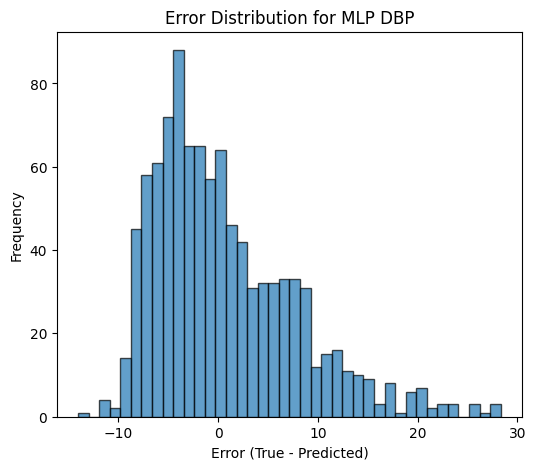

In [20]:
from sklearn.neural_network import MLPRegressor


# Train a basic multilayer perceptron for DBP
mlp_dbp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
mlp_dbp.fit(X_scaled_train, dbp_train)

# Predict and visualize
dbp_pred_mlp = mlp_dbp.predict(X_test_scaled)
evaluate_regression(dbp_test, dbp_pred_mlp, label="MLP DBP")

     Model       R^2         MSE       RMSE        MAE
0  MLP SBP -0.009171  366.390594  19.141333  15.487217


c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


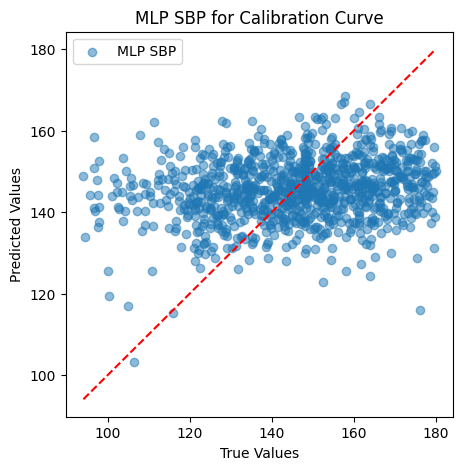

151     35.588623
807      2.823105
621      5.434113
3976   -21.646202
3996   -31.734344
          ...    
4856    -2.354752
1052     7.125763
4926   -21.017700
4058    20.729752
152     35.412567
Name: SBP, Length: 989, dtype: float32


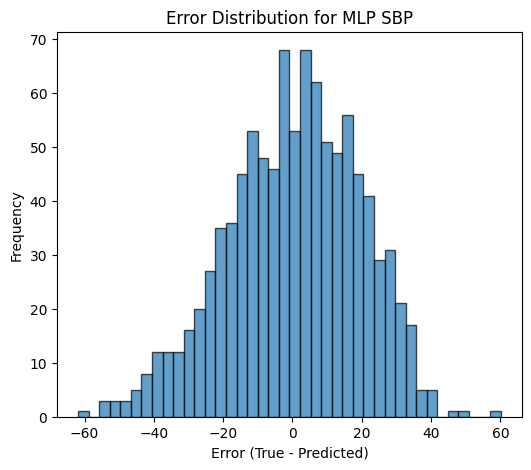

In [21]:
# Train a basic multilayer perceptron for SBP
mlp_sbp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
mlp_sbp.fit(X_scaled_train, sbp_train)

# Predict and visualize
sbp_pred_mlp = mlp_sbp.predict(X_test_scaled)
evaluate_regression(sbp_test, sbp_pred_mlp, label="MLP SBP")

# Multilayer Perceptron w/ Scaled X and Y

     Model       R^2       MSE      RMSE       MAE
0  MLP DBP -0.005069  0.946619  0.972943  0.768313


c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


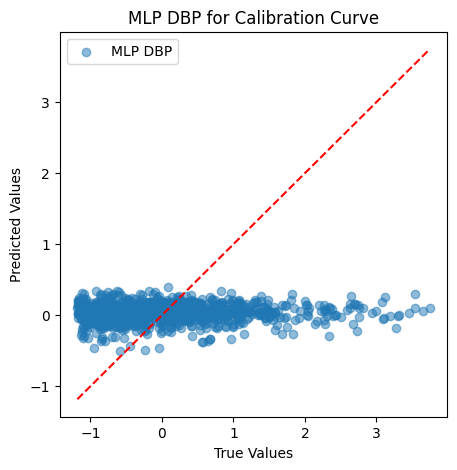

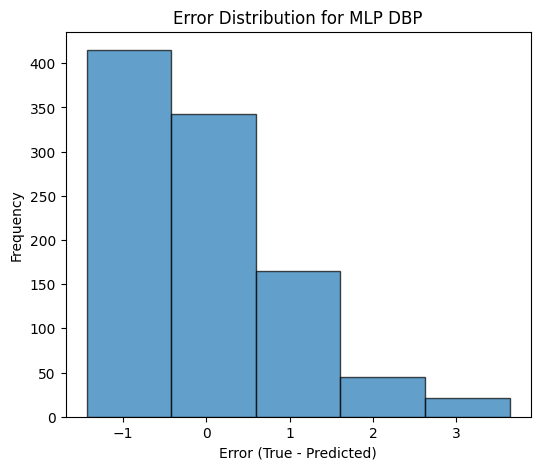

In [ ]:
from sklearn.neural_network import MLPRegressor

# Train a basic multilayer perceptron for DBP
mlp_dbp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
mlp_dbp.fit(X_scaled_train, dbp_train_scaled)

# Predict and visualize
dbp_pred_mlp = mlp_dbp.predict(X_test_scaled)
evaluate_regression(dbp_test_scaled[0].values, dbp_pred_mlp, label="MLP DBP")

c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model       R^2       MSE      RMSE       MAE
0  MLP SBP -0.032902  1.027359  1.013587  0.819877


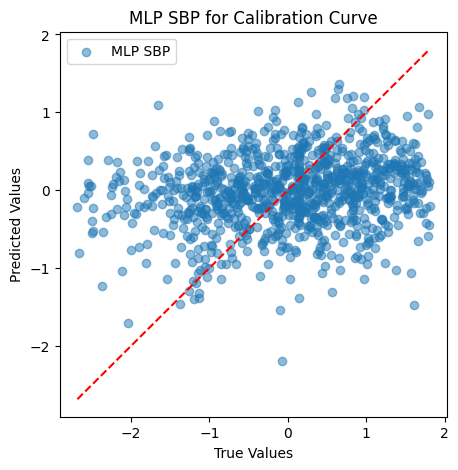

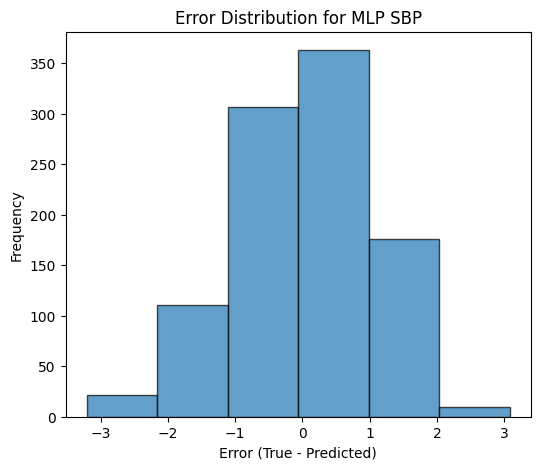

In [35]:
# Train a basic multilayer perceptron for SBP
mlp_sbp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
mlp_sbp.fit(X_scaled_train, sbp_train_scaled)

# Predict and visualize
sbp_pred_mlp = mlp_sbp.predict(X_test_scaled)
evaluate_regression(sbp_test_scaled[0].values, sbp_pred_mlp, label="MLP SBP")